# Reconhecimento de Caracteres


Vamos utilizar o scikit-learn(sklearn) para identificar caracteres.<br>
Este modulo contem todos os recursos para criarmos nossa ferramenta
Alguns dos itens contidos nessa lib:
   * datasets = Dados que vamos usar (imagens de dígitos)
   * svm = learnDados que vamos 
   * model_selection.train_test_split = (helper) assim como em outros exemplos, vamos separar nossos dados em training/testing
   * matplotlib.pyplot = imprimir as imagens <br>

Para poder rodar este algoritmo é necessário:
- Instalar o Jupyter notebook (ou usar um provedor online como o Google Colab que usamos em outra aula), link sobre como instalar o Jupyter: https://medium.com/horadecodar/como-instalar-o-jupyter-notebook-windows-e-linux-20701fc583c
- Instalar a dependencias deste algoritmo na pasta em que este script está como a seguir:

In [18]:
#!pip3 install sklearn
#!pip3 install matplotlib

In [38]:
#Importing dependencies
from sklearn import datasets,svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import sklearn.neural_network as nn

In [39]:

#IMPORT DATA
dataset=datasets.load_digits()


In [40]:
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo


* Vamos armazenar nossas images e as categorias delas

In [41]:
img_data=dataset.images
output_label=dataset.target

## Vamos dar um olhada num preview destes dados

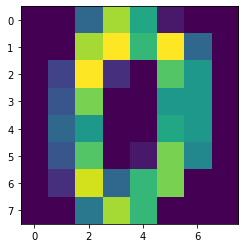

Output Label :  0


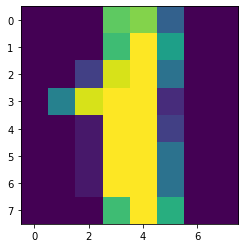

Output Label :  1


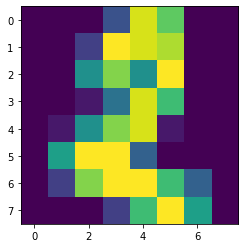

Output Label :  2


In [42]:

#Display few images with labels
for i in range(3):
    plt.imshow(img_data[i])
    plt.show()
    print("Output Label : ",output_label[i])
    

## Como fazer a máquina entender nossos dados ?

Nossos dados estão na forma de imagens, mas como o algoritmo irá interpretar ?

Neste caso usaremos vetores. Aqui nós temos imagens 2D com 8x8 (64) pixels. 

Precisamos então transformar esta imagem em um vetor com 64 posições, esta etapa será o nosso pré-processamento.



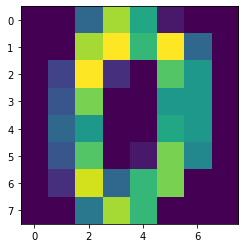

Output Label :  0
O vetor i is : 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Shape de i : (1, 64)


In [43]:

'''
RESHAPE IMAGES(FLATTEN)
Visuzalizando a conversão para um vetor=>
Original Img-dim = 8x8
Result vector = 1x64 
'''
# Pegando uma imagem como amostra
i=img_data[0]

# Checando o que a imagem é
plt.imshow(img_data[0])
plt.show()
print ("Output Label : ",output_label[0])

# Vetorizando
i=i.reshape((64,1))
# Transpondo o vetor
i=i.T 

# Mostrando que i continua "o mesmo" mas em outro formato
print ("O vetor i is : \n",i[0])
print("Shape de i :",i.shape)


### Mas nós temos sorte!

O dataset de digitos que nós temos já tem as imagens convertidar em um array numpy. Vamos então pegar estes dados.

In [44]:
#And so now we shall use the dataset.data for furthur use. 
training_data=dataset.data


In [45]:
#Checando os dados
print(training_data[0])
print("Shape : ",training_data.shape)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Shape :  (1797, 64)


In [46]:
#Separando entre dados de treinamento e dados de teste

X_train,X_test,y_train,y_test = train_test_split(training_data,output_label)
print("Numero total de amostras(samples) : ",len(training_data))
print("Numero de amostras de treinamento : ",len(X_train))
print("Numero de amostras de testes : ",len(X_test))

Numero total de amostras(samples) :  1797
Numero de amostras de treinamento :  1347
Numero de amostras de testes samples :  450


# Definindo o modelo de aprendizado
 
### MLP (Multi-Layer Perceptron)

In [49]:

# Definindo nosso modelo - Multi Layer Perceptron
model=MLPClassifier(hidden_layer_sizes=(64,128,64,10),verbose=True)
                    


### Treinando
Iniciando o treinamento com os dados de treinamento.(i.e - X_train , y_train )

In [50]:
#Adicionando os dados ao modelo
model.fit(X_train,y_train)

Iteration 1, loss = 2.43247238
Iteration 2, loss = 2.01974500
Iteration 3, loss = 1.79363354
Iteration 4, loss = 1.53615133
Iteration 5, loss = 1.27087350
Iteration 6, loss = 1.05574781
Iteration 7, loss = 0.88525725
Iteration 8, loss = 0.75106342
Iteration 9, loss = 0.64401648
Iteration 10, loss = 0.53995499
Iteration 11, loss = 0.44604643
Iteration 12, loss = 0.35681664
Iteration 13, loss = 0.28255181
Iteration 14, loss = 0.22541597
Iteration 15, loss = 0.17866025
Iteration 16, loss = 0.14081882
Iteration 17, loss = 0.11163428
Iteration 18, loss = 0.08895380
Iteration 19, loss = 0.07064738
Iteration 20, loss = 0.05603987
Iteration 21, loss = 0.04641116
Iteration 22, loss = 0.03841010
Iteration 23, loss = 0.03457358
Iteration 24, loss = 0.02723399
Iteration 25, loss = 0.02296394
Iteration 26, loss = 0.02093951
Iteration 27, loss = 0.01761726
Iteration 28, loss = 0.01567863
Iteration 29, loss = 0.01389903
Iteration 30, loss = 0.01255674
Iteration 31, loss = 0.01125845
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 128, 64, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

### Realizando a previsão

In [51]:

prediction=model.predict(X_test)

In [52]:
prediction

array([9, 6, 0, 3, 1, 9, 9, 1, 1, 4, 3, 9, 5, 4, 7, 7, 3, 0, 5, 9, 2, 1,
       0, 2, 2, 0, 9, 8, 8, 9, 4, 8, 7, 4, 6, 6, 3, 2, 9, 4, 5, 1, 5, 4,
       2, 9, 0, 3, 1, 7, 2, 7, 2, 7, 4, 0, 0, 9, 0, 3, 6, 4, 3, 8, 5, 6,
       2, 3, 7, 0, 4, 7, 1, 5, 4, 0, 8, 8, 8, 9, 3, 7, 5, 8, 4, 6, 4, 6,
       5, 5, 5, 8, 1, 4, 1, 1, 9, 3, 6, 8, 4, 9, 4, 0, 6, 1, 7, 0, 2, 5,
       1, 6, 2, 4, 0, 8, 3, 9, 6, 0, 1, 5, 5, 5, 4, 6, 9, 1, 5, 4, 1, 1,
       3, 5, 7, 1, 1, 0, 3, 2, 2, 0, 7, 0, 4, 9, 9, 4, 4, 9, 1, 5, 8, 7,
       3, 3, 1, 2, 2, 9, 8, 3, 3, 5, 4, 7, 0, 8, 0, 2, 1, 6, 0, 8, 5, 1,
       6, 8, 3, 8, 9, 6, 7, 3, 0, 0, 7, 9, 5, 4, 5, 1, 8, 1, 3, 4, 5, 2,
       1, 4, 9, 3, 5, 4, 4, 7, 2, 9, 7, 0, 8, 6, 4, 6, 2, 2, 9, 6, 9, 9,
       7, 8, 9, 5, 1, 8, 1, 8, 6, 1, 1, 8, 0, 1, 7, 1, 9, 7, 6, 7, 4, 2,
       4, 8, 0, 7, 0, 4, 8, 1, 6, 3, 6, 8, 4, 3, 4, 5, 8, 5, 4, 4, 7, 5,
       5, 3, 9, 4, 5, 2, 6, 9, 3, 0, 7, 1, 0, 0, 6, 3, 7, 1, 2, 0, 8, 8,
       8, 3, 2, 8, 2, 1, 6, 2, 1, 2, 0, 8, 6, 5, 2,

### O que são estes dados? O que fazer com eles?

Esta são as classes das imagens x_test conforme classificado pelo nosso MLP



In [53]:
y_test

array([9, 6, 0, 3, 1, 9, 9, 1, 1, 4, 3, 9, 5, 4, 7, 7, 3, 0, 5, 9, 2, 1,
       0, 2, 2, 0, 9, 8, 1, 9, 4, 8, 7, 4, 6, 6, 3, 2, 9, 4, 5, 1, 5, 4,
       2, 9, 0, 9, 1, 7, 2, 7, 2, 7, 4, 0, 0, 9, 0, 3, 6, 4, 3, 8, 5, 6,
       2, 3, 7, 0, 4, 7, 1, 5, 4, 0, 8, 8, 8, 9, 3, 7, 5, 6, 4, 6, 4, 6,
       5, 5, 5, 8, 1, 4, 1, 1, 9, 3, 6, 8, 4, 9, 4, 0, 6, 1, 7, 0, 2, 5,
       1, 6, 2, 4, 0, 8, 3, 9, 6, 0, 1, 5, 5, 5, 4, 6, 9, 1, 5, 4, 1, 1,
       3, 5, 7, 8, 1, 0, 3, 2, 2, 0, 7, 0, 4, 9, 9, 4, 4, 9, 7, 5, 8, 7,
       3, 3, 8, 2, 2, 9, 1, 3, 3, 5, 4, 7, 0, 8, 0, 2, 1, 6, 0, 8, 9, 1,
       6, 8, 3, 8, 9, 6, 7, 3, 0, 0, 7, 9, 5, 4, 5, 1, 8, 1, 3, 4, 5, 2,
       1, 4, 9, 3, 5, 4, 0, 7, 2, 9, 7, 0, 8, 6, 4, 6, 2, 2, 9, 6, 9, 9,
       7, 8, 9, 5, 6, 8, 1, 8, 6, 1, 1, 8, 0, 1, 7, 1, 9, 7, 6, 7, 4, 2,
       4, 8, 0, 7, 0, 4, 8, 1, 0, 3, 6, 8, 4, 3, 4, 5, 8, 5, 4, 4, 7, 5,
       5, 3, 9, 4, 5, 2, 6, 9, 3, 0, 7, 1, 0, 0, 6, 3, 7, 1, 2, 0, 8, 8,
       8, 3, 2, 8, 2, 1, 6, 2, 1, 2, 0, 8, 6, 5, 2,

### Verificando o nosso modelo

Como prever a qualidade do nosso modelo ?<br>
Lembra do vetor y_test?<br>ele contem todas as classificações corretas para as imagens no vetor X_test.<br>
Nós podemos compara o nosso resultado obtido com os resultados que sabemos que estão corretos(y_test) para ver a performance. 

In [57]:
score = 0
ctr=0
misclassified= []
#Evaluating model performance[]
for i,j in zip(y_test,prediction):
    if i==j:
        score+=1
    else:
        misclassified.append((X_test[ctr],y_test[ctr],prediction[ctr]))
        print ("Erro em at ctr=",ctr,"Previsto : ",prediction[ctr],"Correto : ",y_test[ctr])
    ctr+=1

print ("Final Score :",score,"/",len(y_test))
print ("Numero de Erros :",len(misclassified))


Erro em at ctr= 28 Previsto :  8 Correto :  1
Erro em at ctr= 47 Previsto :  3 Correto :  9
Erro em at ctr= 83 Previsto :  8 Correto :  6
Erro em at ctr= 135 Previsto :  1 Correto :  8
Erro em at ctr= 150 Previsto :  1 Correto :  7
Erro em at ctr= 156 Previsto :  1 Correto :  8
Erro em at ctr= 160 Previsto :  8 Correto :  1
Erro em at ctr= 174 Previsto :  5 Correto :  9
Erro em at ctr= 204 Previsto :  4 Correto :  0
Erro em at ctr= 224 Previsto :  1 Correto :  6
Erro em at ctr= 250 Previsto :  6 Correto :  0
Erro em at ctr= 335 Previsto :  6 Correto :  0
Erro em at ctr= 410 Previsto :  9 Correto :  5
Erro em at ctr= 424 Previsto :  4 Correto :  6
Erro em at ctr= 429 Previsto :  7 Correto :  3
Erro em at ctr= 441 Previsto :  1 Correto :  4
Final Score : 434 / 450
Numero de Erros : 16


### O que deu errado?

Vamos ver onde nossa previsão falhou

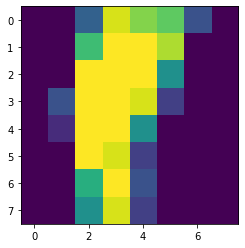

Classe esperada : 1
Classe que foi prevista pelo modelo : 8


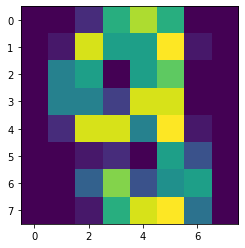

Classe esperada : 9
Classe que foi prevista pelo modelo : 3


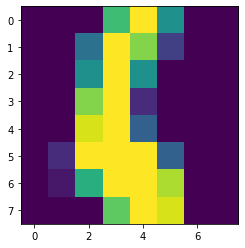

Classe esperada : 6
Classe que foi prevista pelo modelo : 8


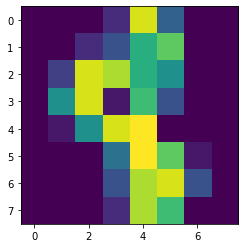

Classe esperada : 8
Classe que foi prevista pelo modelo : 1


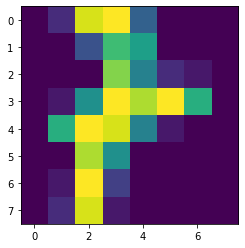

Classe esperada : 7
Classe que foi prevista pelo modelo : 1


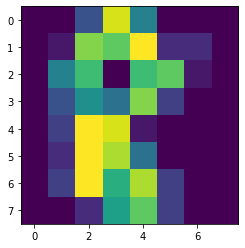

Classe esperada : 8
Classe que foi prevista pelo modelo : 1


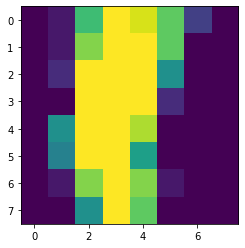

Classe esperada : 1
Classe que foi prevista pelo modelo : 8


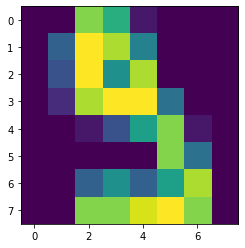

Classe esperada : 9
Classe que foi prevista pelo modelo : 5


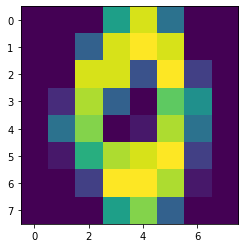

Classe esperada : 0
Classe que foi prevista pelo modelo : 4


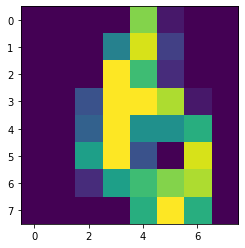

Classe esperada : 6
Classe que foi prevista pelo modelo : 1


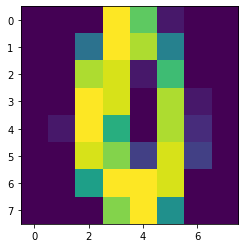

Classe esperada : 0
Classe que foi prevista pelo modelo : 6


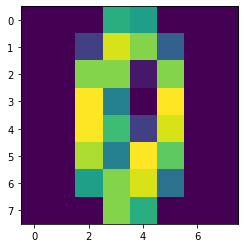

Classe esperada : 0
Classe que foi prevista pelo modelo : 6


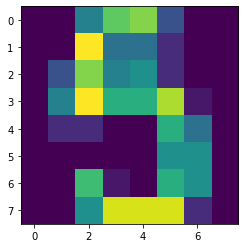

Classe esperada : 5
Classe que foi prevista pelo modelo : 9


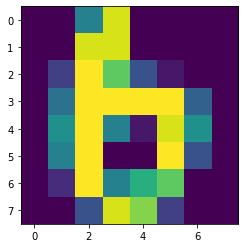

Classe esperada : 6
Classe que foi prevista pelo modelo : 4


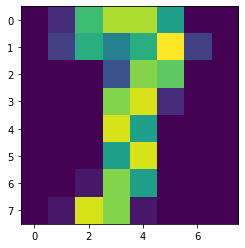

Classe esperada : 3
Classe que foi prevista pelo modelo : 7


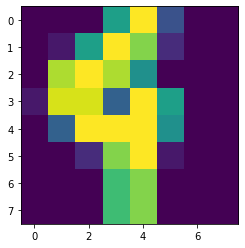

Classe esperada : 4
Classe que foi prevista pelo modelo : 1


In [58]:

#Looking at our misclassification
for data in misclassified:
    plt.imshow(data[0].reshape(8,8))
    plt.show()
    print ("Classe esperada :",data[1])
    print ("Classe que foi prevista pelo modelo :",data[2])

## Então isso quer dizer que isso é o melhor que podemos fazer com MLP?

Não, há muito que podemos fazer, vamos dar uma olhada em algumas coisas que não estamos fazendo certo:

#### Challenges
* Em geral, Redes Neurais tem performance melhor quando o volume de dados é grande. Nosso dataset tem apenas 1700 exemplos, o que é pouco.

* Quando nós convertemos a imagem 2-D em um vetor 1-D nós perdemos a correlação dimensional. Esse problema pode ser vencido usando um tipo especializado de Rede Neural chamado Rede Neural Convolucional (Convolutional Neural Nets(CNN))(Ref :  __[CNN Paper - Yann LeCun ](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)__ )
